# 텐서플로를 이용한 다층 퍼셉트론

### MNIST 와 fashion MNIST 데이터를 이용한 다층 퍼셉트론을 인식하는 프로그램

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [53]:
# mnist 읽어와서 신경망에 입력하는 형태로 변환
# 튜플형태이기 때문에 튜플형식으로 받기
(x_train, y_train),(x_test,y_test) = mnist.load_data() 

In [54]:
x_train.shape   # 28 x 28

(60000, 28, 28)

In [55]:
x_train[0].shape

(28, 28)

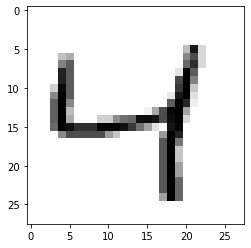

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap = 'gray_r')

In [57]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [58]:
max(x_train[0])

255

In [59]:
# 데이터의 범위를 조정 - 전처리 - 0 ~ 1 사이의 값을 갖도록 
# 이미지는 0 ~ 255 이기에 0 ~ 1사이의 값을 갖도록 조정
# 일반화(normalization) vs 표준화(standardizatioin)

##### 일반화(normalization)
- x = (x - min(x)) / (max(x) - min(x))

  0 ~ 1 사이의 값으로 축소됨
  
  
- 특징 : 최소는 0  최대는 1  나머지는 정규화 형태, 원래데이터의 분포는 손실되지 않음


##### 표준화(standardization)
- 평균에 비해서 최대값이 멀리 떨어져 있는 경우 outlier가 존재
- z-score를 먼저 계산해야 함
- x = (x - m) / std(표준편차)
- 특징 : 평균에서 크게 벗어난 outlier 일수록 큰 절댓값을 가짐
- 이 score가 -2 ~ 2를 벗어난 값들은 모두 지움

In [60]:
# numpy는 행렬 계산을 지원함
# 값을 실수형태로 바꿈
# x_train, x_test 일반화(정규화)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [61]:
# 라벨정보는 원핫인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)  # ,10 은 생략가능 >>  unique 값까지 계산하기 때문
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [74]:
# x_train이 2차원이었는데 1차원으로 핌
x_train.shape

(60000, 784)

In [75]:
n_input = 784
n_output = 10

# 정해진 규칙이 없음
# hidden은 input보다 크면 좋긴함
n_hidden = 784 * 2

In [78]:
# 신경망 설계 - 두번째 hidden층 부터는 초기화(kernel_initializer)는 선택사항이다
model = Sequential()
dense1 = Dense(units=n_hidden, activation='tanh',input_shape = (n_input,), # 출력형태는 되도록 튜플형태가 되도록( , )가 되게끔 함
               kernel_initializer='random_uniform', bias_initializer='zeros')   # bias_initializer 은 최초상태이기에 0으로 가정함
dense2 = Dense(units=n_output, # 층을 하나만 만들고 끝내려면 units(입력값) = n_output을 줌으로써 최종 출력 값 지정
               activation='tanh') # 커널을 해도되고 안해도됨
model.add(dense1)
model.add(dense2)
model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [79]:
# batch 와 epochs는 하이퍼파라미터로 튜닝
hist = model.fit(x_train,y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test))

Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0567 - accuracy: 0.8066 - val_loss: 0.0366 - val_accuracy: 0.8868
Epoch 2/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0266 - accuracy: 0.9216 - val_loss: 0.0223 - val_accuracy: 0.9374
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0196 - accuracy: 0.9445 - val_loss: 0.0174 - val_accuracy: 0.9502
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0162 - accuracy: 0.9547 - val_loss: 0.0146 - val_accuracy: 0.9578
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0141 - accuracy: 0.9608 - val_loss: 0.0136 - val_accuracy: 0.9615
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0127 - accuracy: 0.9658 - val_loss: 0.0126 - val_accuracy: 0.9643
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0114 - accuracy: 0.9691 - val_loss: 0.0113 - val_accuracy: 0.9662
Ep

In [80]:
res = model.evaluate(x_test,y_test)
res

313/313 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9784


[0.0077079543843865395, 0.9783999919891357]

In [82]:
type(hist.history)

dict

In [83]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [84]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize = (10,2.5))
sns.lineplot(data=hist.history['accuracy'], ax= ax[0])
sns.lineplot(data=hist.history['val_accuracy'], ax= ax[0])
fig.legend(['accuracy','val_accuracy'], loc = 'upper left')

sns.lineplot(data=hist.history['loss'], ax= ax[1])
sns.lineplot(data=hist.history['val_loss'], ax= ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [ ]:
# 위의 결과에 따라서 epoch는 15로 보면 된다

---

##### fashion MNIST

In [105]:
from tensorflow.keras.datasets import fashion_mnist

In [106]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [107]:
x_train.shape

(60000, 28, 28)

In [108]:
y_train.shape

(60000,)

In [109]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

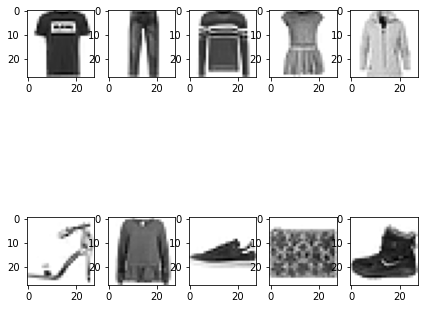

In [124]:
# plt.figure(figsize=(3,3))
fig, ax = plt.subplots(2,5,figsize=(7,7))
for i in range(10):
    imagedata = x_train[y_train == i][0]
    ax[i//5,i%5].imshow(imagedata,cmap = 'gray_r')

In [126]:
model = Sequential()
dense1 = Dense(units=n_hidden, activation='tanh',input_shape = (n_input,), # 출력형태는 되도록 튜플형태가 되도록( , )가 되게끔 함
               kernel_initializer='random_uniform', bias_initializer='zeros')   # bias_initializer 은 최초상태이기에 0으로 가정함
dense2 = Dense(units=n_output, # 층을 하나만 만들고 끝내려면 units(입력값) = n_output을 줌으로써 최종 출력 값 지정
               activation='tanh') # 커널을 해도되고 안해도됨
model.add(dense1)
model.add(dense2)
model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

# reshape
x_train = x_train.reshape(-1,28*28)  # 3차원 >> 2 차원
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.reshape(-1,28*28)
x_test = x_test.astype(np.float32)/255.0

# 정답은 one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

hist = model.fit(x_train,y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test))

Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0024 - accuracy: 0.0864 - val_loss: 1.9325e-07 - val_accuracy: 0.0793
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 4.2331e-07 - accuracy: 0.0794 - val_loss: 1.6215e-07 - val_accuracy: 0.0769
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 3.6452e-07 - accuracy: 0.0761 - val_loss: 1.3436e-07 - val_accuracy: 0.0734
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 3.1075e-07 - accuracy: 0.0722 - val_loss: 1.1003e-07 - val_accuracy: 0.0674
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 2.6427e-07 - accuracy: 0.0670 - val_loss: 9.1079e-08 - val_accuracy: 0.0623
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 2.2538e-07 - accuracy: 0.0615 - val_loss: 7.6068e-08 - val_accuracy: 0.0573
Epoch 7/30
469/469 [==============================] - 4s 10ms/step - loss: 1.9202e-07 - accuracy: 0

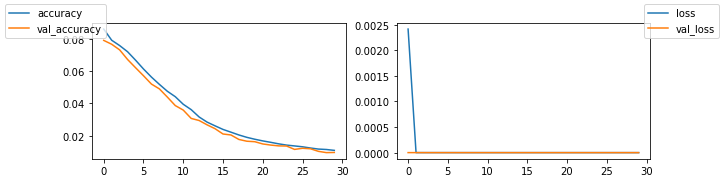

In [127]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize = (10,2.5))
sns.lineplot(data=hist.history['accuracy'], ax= ax[0])
sns.lineplot(data=hist.history['val_accuracy'], ax= ax[0])
fig.legend(['accuracy','val_accuracy'], loc = 'upper left')

sns.lineplot(data=hist.history['loss'], ax= ax[1])
sns.lineplot(data=hist.history['val_loss'], ax= ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [ ]:
# 위의 표를 보고 epoch는 10이 적당한것 같음

---

##### 깊은 다층 퍼셉트론 DMLP(deep MLP) 구조

- ni : i번째 은닉층에 ni개의 노드(ni 하이퍼 파라미터)
- ni = 500이라고 가정하고 모든 은닉층이 같은 노드의 개수를 리턴하면
> L = 5

  > {(784 + 1) * 500} + {(500 + 1) * 500 * 3} + (500 + 1) = 1,149,010

In [ ]:
from IPython import display
display.Image('./img/020.jpg', width = 500, height = 500)